In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
import random
random.seed(1234)

Text(0.5, 1.0, 'Missing Values in Train dataset')

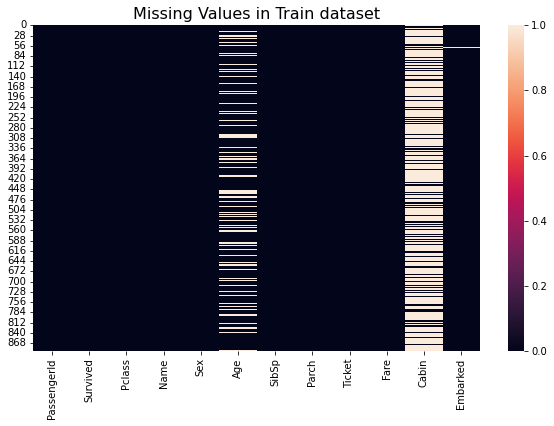

In [5]:
#missing values in train dataset
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull())
plt.title('Missing Values in Train dataset', size=16)

Text(0.5, 1.0, 'Missing Values in Test dataset')

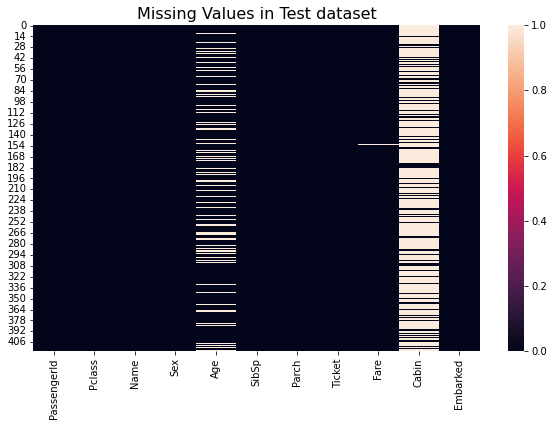

In [6]:
#missing values in test dataset
plt.figure(figsize=(10, 6))
sns.heatmap(test.isnull())
plt.title('Missing Values in Test dataset', size=16)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#dropping passengerid and name column
train.drop(['PassengerId', 'Name'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count Plot of Embarked')

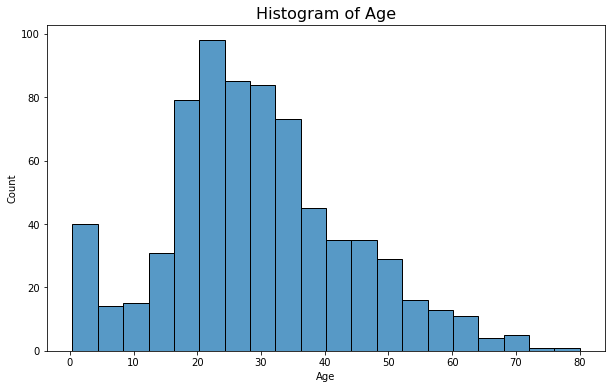

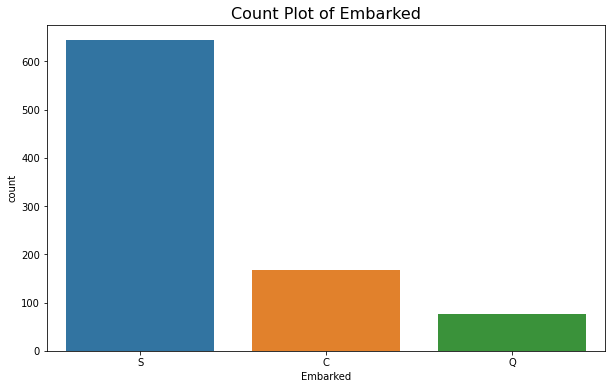

In [9]:
#plotting missing numbers cols of train dataset
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'])
plt.title('Histogram of Age', size=16)
plt.figure(figsize=(10, 6))
sns.countplot('Embarked', data=train)
plt.title('Count Plot of Embarked', size=16)


In [10]:
#imputing missing values
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train['Age'].fillna(train['Age'].median(), inplace=True)

In [11]:
#describe test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Cabin     91 non-null     object 
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


Text(0.5, 1.0, 'Histogram Plot of Fare')

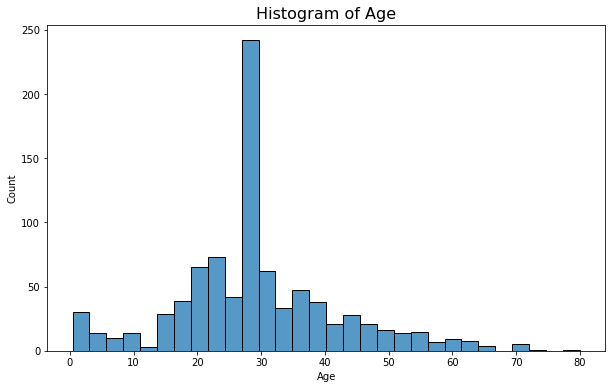

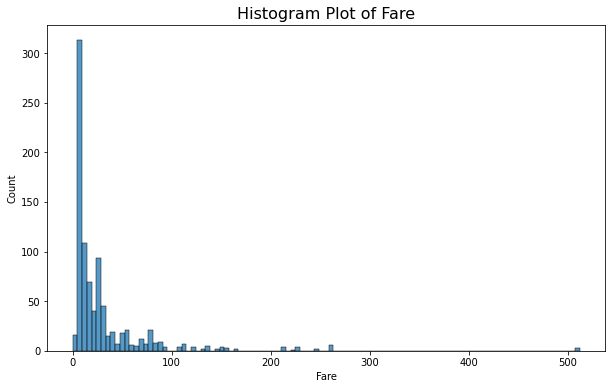

In [12]:
#plotting missing values cols of test dataset
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'])
plt.title('Histogram of Age', size=16)
plt.figure(figsize=(10, 6))
sns.histplot(train['Fare'])
plt.title('Histogram Plot of Fare', size=16)



In [13]:
#imputing missing values 
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class of Passenger over Survival')

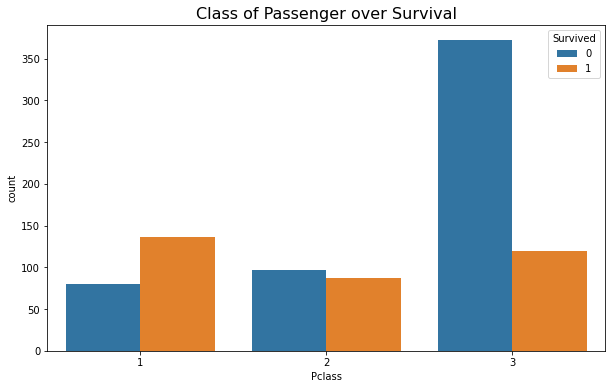

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(train['Pclass'], hue= train['Survived'])
plt.title('Class of Passenger over Survival', size=16)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Embarked with respect to Survival')

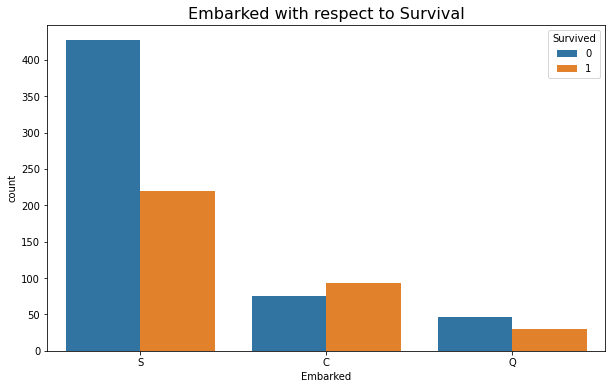

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(train['Embarked'], hue= train['Survived'])
plt.title('Embarked with respect to Survival', size=16)


Text(0.5, 1.0, 'Histogram of Age with respect to Survival')

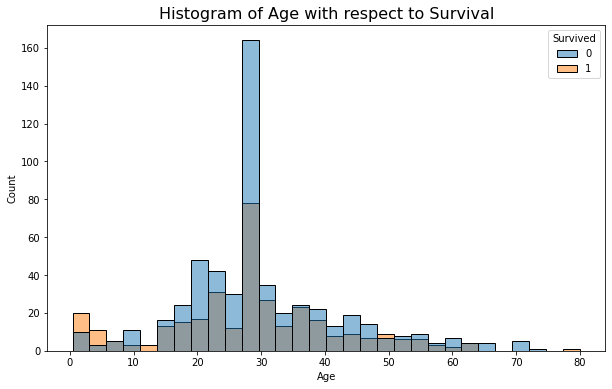

In [16]:

plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=train)
plt.title('Histogram of Age with respect to Survival', size=16)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of Parch with respect to Survival')

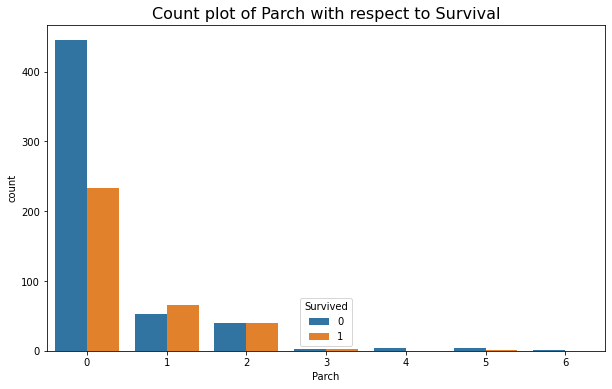

In [17]:
#Count plot of Parch with respect to Survival
plt.figure(figsize=(10, 6))
sns.countplot(train['Parch'], hue= train['Survived'])
plt.title('Count plot of Parch with respect to Survival', size=16)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of SibSp with respect to Survival')

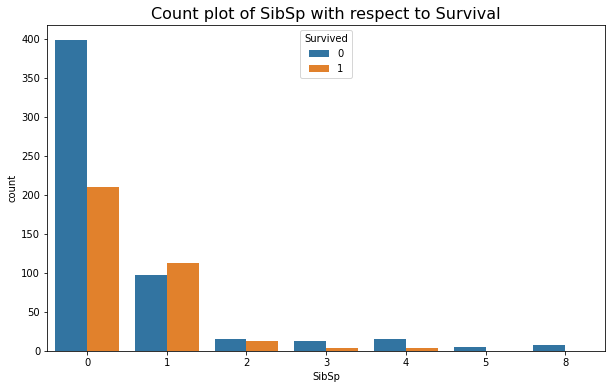

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(train['SibSp'], hue= train['Survived'])
plt.title('Count plot of SibSp with respect to Survival', size=16)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of Sex with respect to Survival')

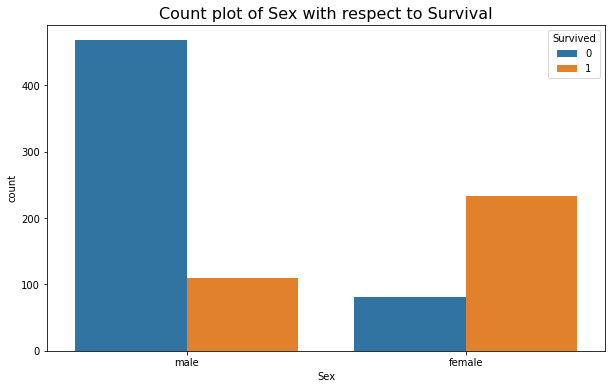

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(train['Sex'], hue= train['Survived'])
plt.title('Count plot of Sex with respect to Survival', size=16)



0    549
1    342
Name: Survived, dtype: int64


Text(0.5, 1.0, 'Class distribution')

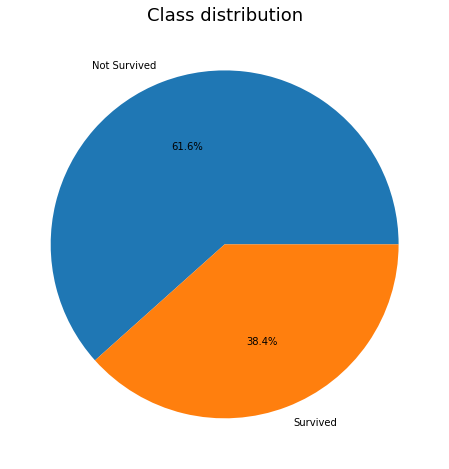

In [20]:
value_counts = train['Survived'].value_counts()
print(value_counts)


plt.figure(figsize=(12,8))
plt.pie(value_counts, labels = ['Not Survived', 'Survived'],autopct='%1.1f%%')
plt.title('Class distribution', size=18)

<AxesSubplot:>

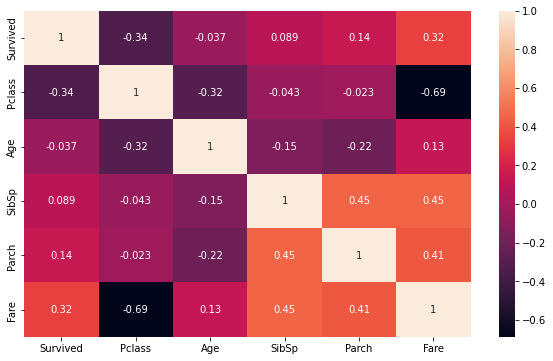

In [21]:
correlation = train.corr(method='spearman')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True)


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
train_num = [x for x in train.columns if train[x].dtypes!=np.object]
train_num = train[train_num]

vif_data = pd.DataFrame()
vif_data["feature"] = train_num.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train_num.values, i)
                          for i in range(len(train_num.columns))]
  
print(vif_data)

    feature       VIF
0  Survived  1.623374
1    Pclass  3.714238
2       Age  3.939674
3     SibSp  1.566551
4     Parch  1.555587
5      Fare  1.831183


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [23]:
#train['Cabin'].fillna(train['Cabin'].mode()[0], inplace=True)
#test['Cabin'].fillna(test['Cabin'].mode()[0], inplace=True)

#As Cabin column has maximum null values, we are dropping the entire column
train.drop('Cabin', inplace=True, axis=1)
test.drop('Cabin', inplace=True, axis=1)

In [24]:
print('Nulls in Train dataset : ',train.isnull().sum())
print('*'*80)
print('*'*80)
print('Nulls in Test dataset : ',test.isnull().sum())

Nulls in Train dataset :  Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64
********************************************************************************
********************************************************************************
Nulls in Test dataset :  Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


<AxesSubplot:xlabel='col_name', ylabel='uniques'>

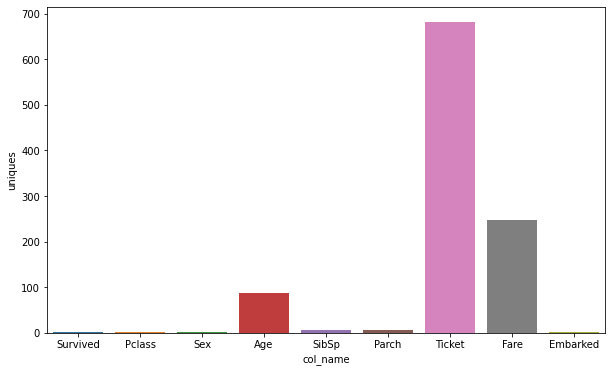

In [25]:
plt.figure(figsize=(10, 6))
df = pd.DataFrame(((col,len(train[col].unique())) for col in train.columns), columns = ['col_name', 'uniques'])
sns.barplot(x = 'col_name', y = 'uniques', data=df)

In [26]:
#ticket cols has many unique classes which can't contribute to classification
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [27]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
train_transformed = ord_enc.fit_transform(train)
print(train_transformed.shape, train.shape)
print(train_transformed)
train_transformed = pd.DataFrame(train_transformed, columns = train.columns)
y = train_transformed['Survived']
x = train_transformed.drop('Survived', axis=1)

(891, 8) (891, 8)
[[  0.   2.   1. ...   0.  18.   2.]
 [  1.   0.   0. ...   0. 207.   0.]
 [  1.   2.   0. ...   0.  41.   2.]
 ...
 [  0.   2.   0. ...   2. 131.   2.]
 [  1.   0.   1. ...   0. 153.   0.]
 [  0.   2.   1. ...   0.  30.   1.]]


In [28]:
#anova for numerical features
from sklearn.feature_selection import SelectKBest, f_classif, chi2
anova = SelectKBest(f_classif, k='all')
anova.fit(x, y)

feature_names = anova.get_feature_names_out()
p_values = anova.pvalues_
for en in zip(feature_names, p_values):
    if en[1]>0.1:
        print(f'{en[0]} has p_values {en[1]} which is less than significance level')


SibSp has p_values 0.4315092575763657 which is less than significance level


In [29]:
#chi2 for numerical features
chi_sq = SelectKBest(chi2, k='all')
chi_sq.fit(x, y)
feature_names = chi_sq.get_feature_names_out()
p_values = chi_sq.pvalues_
for en in zip(feature_names, p_values):
    if en[1]>0.1:
        print(f'{en[0]} has p_values {en[1]} which is less than significance level')


SibSp has p_values 0.2662355366655962 which is less than significance level


In [30]:
#train.drop(['SibSp'], axis=1, inplace=True)
#test.drop(['SibSp'], axis=1, inplace=True)

train['fam_size'] = train['SibSp'] + train['Parch'] + 1
test['fam_size'] = test['SibSp'] + test['Parch'] + 1

In [31]:
print('Shape of Train: ',train.shape)
print('Shape of Test: ',test.shape)

Shape of Train:  (891, 9)
Shape of Test:  (418, 8)


In [32]:
train.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [33]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'fam_size'], dtype='object')

In [34]:
# from sklearn.preprocessing import StandardScaler
# train_temp = train[['Age', 'Fare']]
# scale= StandardScaler()
# scaled_data = scale.fit_transform(train_temp) 
# scaled_data
# train.drop(['Age', 'Fare'], axis=1, inplace=True)
# train = pd.concat([train, pd.DataFrame(scaled_data, columns=['Age', 'Fare'])], axis=1)
# train

In [35]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import GradientBoostingClassifier  
# Sequential Forward Selection(sfs)

y = train['Survived']
x = pd.get_dummies(train.drop(['Survived'], axis=1), drop_first=True)
sfs = SFS(GradientBoostingClassifier(max_depth=2, learning_rate=0.2),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'accuracy',
          cv = 5)
sfs.fit(x, y)


SequentialFeatureSelector(estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                               max_depth=2),
                          k_features=5, scoring='accuracy')

In [36]:
sfs.k_feature_names_

('Pclass', 'Age', 'Fare', 'fam_size', 'Sex_male')

In [37]:
data = pd.concat([train, test], axis=0)
data_transformed = pd.get_dummies(data, drop_first=True)
train_transformed = data_transformed.iloc[:train.shape[0], :]
test_transformed = data_transformed.iloc[train.shape[0]:, :]
test_transformed.drop('Survived', axis=1, inplace=True)

y = train_transformed['Survived']
x = train_transformed.drop('Survived', axis=1)

from sklearn.model_selection import train_test_split, GridSearchCV
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=1234)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
def compute_model(model_obj, params):
    grid_model = GridSearchCV(model_obj, params, cv=10)
    grid_model.fit(xtrain, ytrain)
    
    ypred_train = grid_model.best_estimator_.predict(xtrain)
    #ypred_train = model.predict(xtrain)

    from sklearn.metrics import accuracy_score
    train_accuracy = accuracy_score(ytrain, ypred_train)
    

    ypred = grid_model.best_estimator_.predict(xtest)
    #ypred = model.predict(xtest)
    test_accuracy = accuracy_score(ytest, ypred)
    


    results = grid_model.best_estimator_.predict(test_transformed)
    #results = model.predict(test_transformed)

    return model_obj, results, train_accuracy, test_accuracy, grid_model.best_estimator_

In [39]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

from sklearn.ensemble import GradientBoostingClassifier
gb_param_grid = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.1, 0.001, 0.01, 0.2, 0.05], 'n_estimators': [20, 50, 80, 100, 120, 150, 180, 200]}
gb_model = GradientBoostingClassifier()

from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {'n_estimators': [20, 50, 80, 100, 120, 150, 180, 200], 'max_depth': [1, 2, 3, 4,5]}
rf_model = RandomForestClassifier()

from sklearn.ensemble import AdaBoostClassifier
ab_param_grid = {'learning_rate': [0.1, 0.001, 0.01, 0.2, 0.05], 'n_estimators': [20, 50, 80, 100, 120, 150, 180, 200]}
ab_model = AdaBoostClassifier()

from xgboost import XGBClassifier
xg_param_grid = {'learning_rate': [0.1, 0.001, 0.01, 0.2, 0.05], 'n_estimators': [20, 50, 80, 100, 120, 150, 180, 200, 250, 300], 'max_depth': [1, 2, 3, 4, 5, 6]}
xg_model = XGBClassifier()

from sklearn.tree import DecisionTreeClassifier
dt_param_grid = {'max_depth': [1, 2, 3, 4, 5, 6]}
dt_model = DecisionTreeClassifier()

from sklearn.svm import SVC
sv_param_grid = {'C': [0.1, 0.2, 0.3, 0.4, 0.001, 1, 2, 3], 'kernel': ['linear', 'rbf', 'poly']}
sv_model = SVC()


In [40]:
all_models = {lr_model: {}, gb_model: gb_param_grid, rf_model: rf_param_grid, ab_model:ab_param_grid, xg_model: xg_param_grid, dt_model: dt_param_grid, sv_model: sv_param_grid}
model_results = list()
model_prediction = dict()
for model_obj, params in all_models.items():
    model_obj, results, train_accuracy, test_accuracy, best_estimator = compute_model(model_obj, params)
    model_results.append([model_obj, train_accuracy, test_accuracy, best_estimator])
    model_prediction[model_obj] = results
    print(model_obj, train_accuracy, test_accuracy, best_estimator)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression() 0.7990012484394506 0.8444444444444444 LogisticRegression()
GradientBoostingClassifier() 0.8776529338327091 0.8666666666666667 GradientBoostingClassifier(max_depth=2, n_estimators=180)
RandomForestClassifier() 0.8514357053682896 0.8777777777777778 RandomForestClassifier(max_depth=5, n_estimators=80)
AdaBoostClassifier() 0.818976279650437 0.8222222222222222 AdaBoostClassifier(learning_rate=0.05, n_estimators=150)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monoto

In [41]:
results = pd.DataFrame(model_results, columns = ['Model Name', 'Training Accuracy', 'Test Accuracy', 'Best Parameters'])
results


,Model Name,Training Accuracy,Test Accuracy,Best Parameters
0,LogisticRegression(),0.799001,0.844444,LogisticRegression()
1,GradientBoostingClassifier(),0.877653,0.866667,([DecisionTreeRegressor(criterion='friedman_ms...
2,RandomForestClassifier(),0.851436,0.877778,"(DecisionTreeClassifier(max_depth=5, max_featu..."
3,AdaBoostClassifier(),0.818976,0.822222,"(DecisionTreeClassifier(max_depth=1, random_st..."
4,"XGBClassifier(base_score=None, booster=None, c...",0.880150,0.877778,"XGBClassifier(base_score=0.5, booster='gbtree'..."
5,DecisionTreeClassifier(),0.830212,0.844444,DecisionTreeClassifier(max_depth=3)
6,SVC(),0.782772,0.822222,"SVC(C=0.1, kernel='linear')"


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'LogisticRegression()'),
  Text(1, 0, 'GradientBoostingClassifier()'),
  Text(2, 0, 'RandomForestClassifier()'),
  Text(3, 0, 'AdaBoostClassifier()'),
  Text(4, 0, 'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, gamma=None,\n              gpu_id=None, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=None, max_bin=None,\n              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,\n              max_leaves=None, min_child_weight=None, missing=nan,\n              monotone_constraints=None, n_estimators=100, n_jobs=None,\n              num_parallel_tree=None, predictor=None, random_state=None,\n              reg_alpha=None, reg_lambda=None, ...)'),
  Text(5, 0, 'DecisionTreeClassifier(

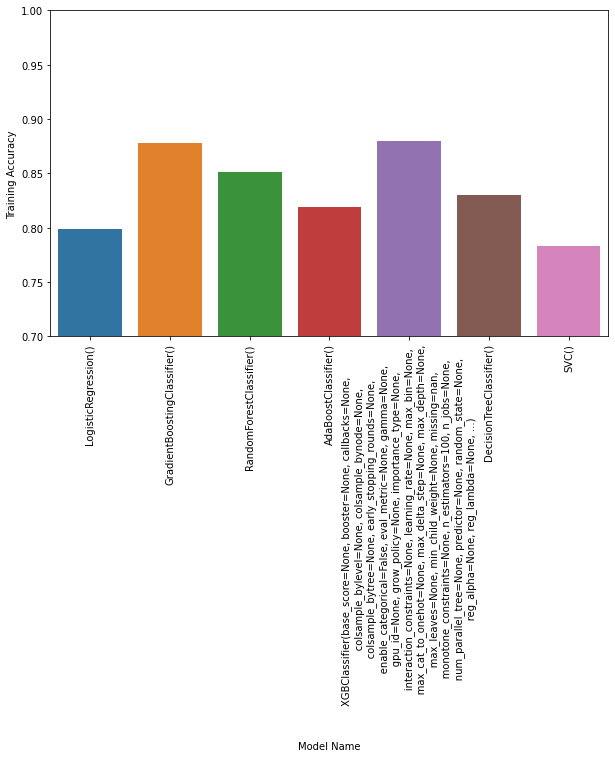

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x = results['Model Name'].astype('category'), y = results['Training Accuracy'])
plt.ylim(0.7, 1.0)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'LogisticRegression()'),
  Text(1, 0, 'GradientBoostingClassifier()'),
  Text(2, 0, 'RandomForestClassifier()'),
  Text(3, 0, 'AdaBoostClassifier()'),
  Text(4, 0, 'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, gamma=None,\n              gpu_id=None, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=None, max_bin=None,\n              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,\n              max_leaves=None, min_child_weight=None, missing=nan,\n              monotone_constraints=None, n_estimators=100, n_jobs=None,\n              num_parallel_tree=None, predictor=None, random_state=None,\n              reg_alpha=None, reg_lambda=None, ...)'),
  Text(5, 0, 'DecisionTreeClassifier(

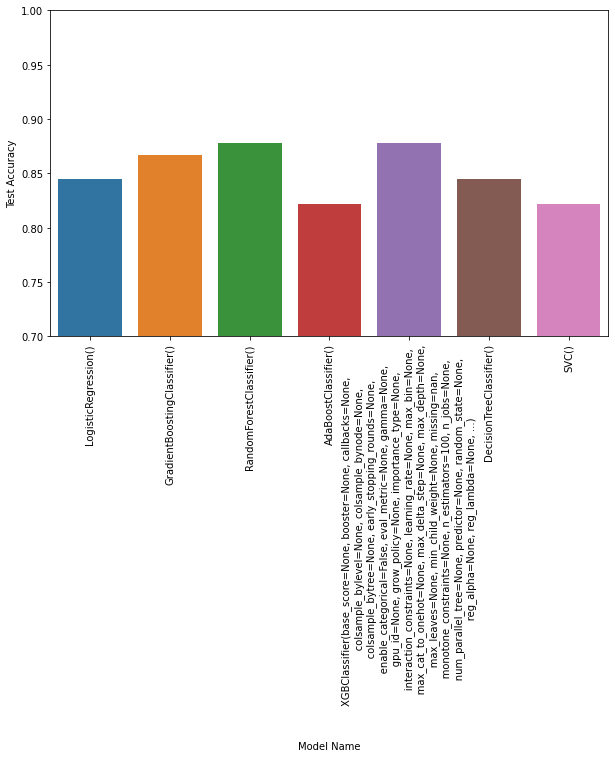

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x = results['Model Name'].astype('category'), y = results['Test Accuracy'])
plt.ylim(0.7, 1.0)
plt.xticks(rotation=90)

In [44]:
sample = pd.read_csv('../input/titanic/gender_submission.csv')
sample['Survived'] = [int(x) for x in model_prediction[ab_model]]
sample.to_csv('Sample.csv', index=False)

# Stacking

In [45]:
from sklearn.metrics import accuracy_score
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(dt_model,rf_model, ab_model,gb_model,xg_model),
                                meta_classifier=dt_model,
                                use_features_in_secondary=True,cv=10)
stack_gen.fit(np.array(xtrain),np.array(ytrain))
ypred = stack_gen.predict(np.array(xtest))

print('StackingCV Accuracy {}'.format(accuracy_score(ytest,ypred)))

results = stack_gen.predict(test_transformed)


StackingCV Accuracy 0.7555555555555555


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [46]:
#max votes classifier
combine_results = list()
preferred_models = [gb_model, xg_model,ab_model, dt_model, rf_model]

for x in range(test.shape[0]):
    all_preds= [preds[x] for model, preds in model_prediction.items() if model in preferred_models]
    combine_results.append(max(all_preds, key=all_preds.count))

sample = pd.read_csv('../input/titanic/gender_submission.csv')      
sample['Survived'] = [int(x) for x in combine_results]
sample.to_csv('Sample.csv', index=False)    